In [1]:
%load_ext autoreload
%autoreload 2

In [94]:
import sys

import matplotlib.pyplot as plt

sys.path.append('..')
from src.models import get_model, SteganographyModels
from src.__main__ import CLI

print("Available models:")
print('\n'.join(list(map(lambda x: str(x).split('.')[-1], SteganographyModels))))

Available models:
LSB


## Constants

In [113]:
#IMAGE_PATH = "../tests/test_images/cat.jpg"
IMAGE_PATH = "../tests/test_images/cs.png"

MODEL_NAME = "LSB"

MESSAGE = "Hello world !" * 100

## Show image and hide the image

In [114]:
cli = CLI()

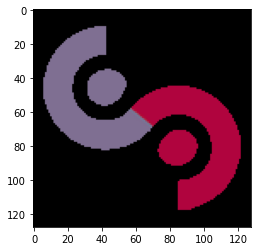

In [115]:
image = cli._load_image(IMAGE_PATH)
plt.figure()
plt.imshow(image)
plt.show()

In [116]:
model = get_model(MODEL_NAME)

In [117]:
encoded_image = model.encode(
    image=image, message=MESSAGE
)

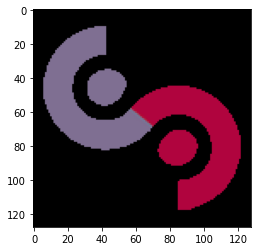

In [118]:
plt.figure()
plt.imshow(image)
plt.show()

In [119]:
message = model.decode(encoded_image)
print('Decoded message:')
print(message[:40])

assert message == MESSAGE, "The messages are not the same"

Decoded message:
Hello world !Hello world !Hello world !H


## Data analysis

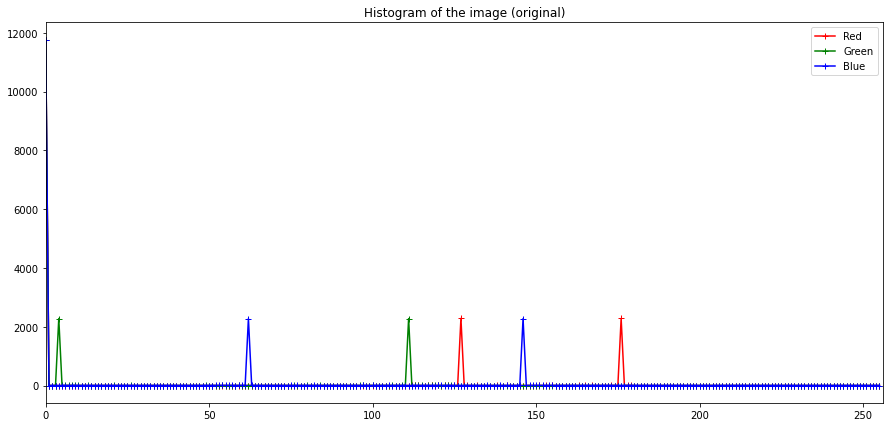

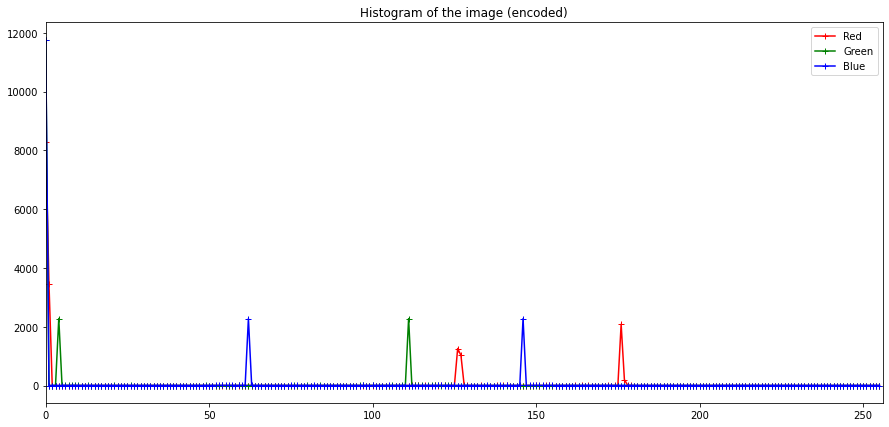

In [124]:
from src.analysis.histogram import generate_histogram, plot_histogram, compare_histograms, compute_diff_imgs

plt.figure(figsize=(15,7))
plt.title('Histogram of the image (original)')
plot_histogram(generate_histogram(image))
plt.figure(figsize=(15,7))
plt.title('Histogram of the image (encoded)')
plot_histogram(generate_histogram(encoded_image))

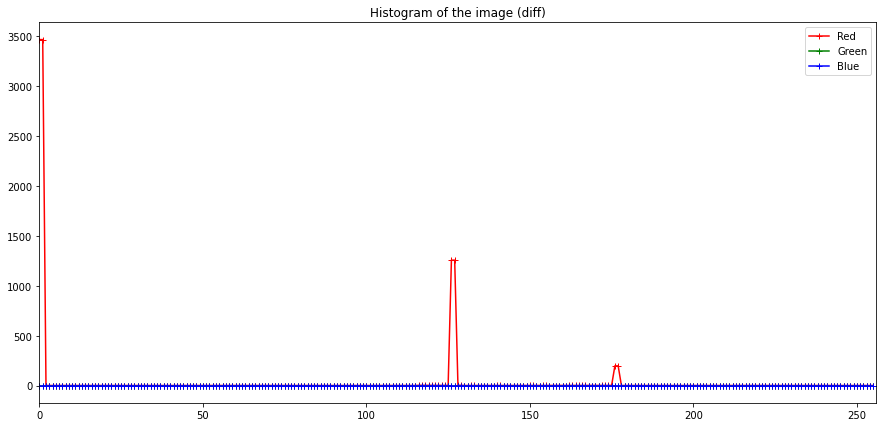

In [126]:
plt.figure(figsize=(15,7))
plt.title('Histogram of the image (diff)')

plot_histogram(
    compare_histograms(
        generate_histogram(image),
        generate_histogram(encoded_image)
    )
)

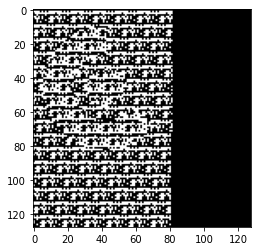

In [128]:
plt.imshow(compute_diff_imgs(image, encoded_image), cmap='gray');